<a href="https://colab.research.google.com/github/lbeatrice353/IR412_Final/blob/main/ITP487_Exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PYTHON MODULES
# import user-installed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# pandas options
pd.set_option('display.max_rows', 100)

In [2]:
# Section 1 - loading in the data
# use !wget -nc 'github path' to pull the survey data


#load data from github
!wget "https://raw.githubusercontent.com/lbeatrice353/ITP487_StudentSurvey/main/F2023_StudentSurvey.v2.csv"

student_survey_raw = pd.read_csv('F2023_StudentSurvey.v2.csv')

# data preview
student_survey_raw.head()

--2023-11-29 08:35:28--  https://raw.githubusercontent.com/lbeatrice353/ITP487_StudentSurvey/main/F2023_StudentSurvey.v2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23710 (23K) [text/plain]
Saving to: ‘F2023_StudentSurvey.v2.csv’

F2023_StudentSurvey 100%[===================>]  23.15K  --.-KB/s    in 0.002s  

2023-11-29 08:35:28 (10.8 MB/s) - ‘F2023_StudentSurvey.v2.csv’ saved [23710/23710]



,16 Personality Type Results,Major_1,Major_2,Minor_1,Minor_2,PDP_Status,Grad_Year,Class_Standing,GPA,Semester_Units,...,Zip_Code_US,Is_California_Home,Languages_Spoken,News_Source,Loves_to_Travel,Foodie,Purchase_Based_On_Sustainability,Reusable_Water_Bottle,Meals_Delivery_Service_Percent,Ride_Share_Percent
0,ISFJ-T,Business Administration,Accounting,Applied Analytics,NaN,No,2025,Junior,3.88,20.0,...,NaN,No,2,Youtube,Yes,Yes,No,Yes,50%,100%
1,INTJ-T,Communication,NaN,Applied Analytics,NaN,Yes,2024,Senior,3.95,17.0,...,NaN,No,3,"News Sites. (e.g. Wall Street Journal,Other",Yes,Yes,No,Yes,0%,0%
2,ISTJ-T,Business Administration,NaN,Applied Analytics,NaN,No,2024,Senior,3.94,20.0,...,95148.0,Yes,2,"Twitter,Tiktok,TV,Youtube,News Sites. (e.g. Wa...",Yes,Yes,No,Yes,0%,0%
3,ENFJ-A,Accounting,NaN,Data Science,NaN,No,2024,Senior,3.56,17.0,...,94568.0,Yes,2,"Instagram,News Sites. (e.g. Wall Street Journal",Yes,Yes,Yes,Yes,0%,0%
4,INTP-T,Economics,NaN,Applied Analytics,NaN,No,2025,Junior,3.92,16.0,...,NaN,No,3,"Instagram,Twitter,Google News,News Sites. (e.g...",Yes,Yes,Yes,Yes,25%,25%


In [3]:
# Section 2 - cleaning the data

# creating a deep copy

student_survey = student_survey_raw.copy()

# Rename the first column to “Personality_Type” (hint: use df.rename())
student_survey.rename(columns={'16 Personality Type Results': 'Personality_Type'}, inplace=True)

# Remove null columns and duplicates
# HINT: Only remove null columns
student_survey = student_survey.drop_duplicates()
student_survey = student_survey.dropna(axis='columns')

# Isolate the variables of interest: ‘Personality_Type’, ‘Grad_Year’, ‘GPA’, ‘Sex’, ‘Overall_USC_Exp’, ‘Merit_Scholarship_Percent’, ’Age’ and ‘USC_Social_Exp’ into a new data frame.
df = student_survey[['Personality_Type', 'Grad_Year', 'GPA', 'Sex', 'Overall_USC_Exp', 'Merit_Scholarship_Percent', 'Age', 'USC_Social_Exp']]

# Create a new column in the new data frame that states the letter you were assigned to extract. The options are (only do the pair you were assigned to):
# P/J
df['P/J'] = df['Personality_Type'].str[3]

df.head()

<ipython-input-3-c8ea57c37072>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P/J'] = df['Personality_Type'].str[3]


,Personality_Type,Grad_Year,GPA,Sex,Overall_USC_Exp,Merit_Scholarship_Percent,Age,USC_Social_Exp,P/J
0,ISFJ-T,2025,3.88,Female,5,0%,21,4,J
1,INTJ-T,2024,3.95,Male,4,25%,23,4,J
2,ISTJ-T,2024,3.94,Female,3,0%,20,3,J
3,ENFJ-A,2024,3.56,Male,4,0%,22,4,J
4,INTP-T,2025,3.92,Female,3,0%,20,3,P


Female    11
Male       9
Name: Sex, dtype: int64


Text(0.5, 1.0, "Sex Breakdown of 'P' Students Surveyed")

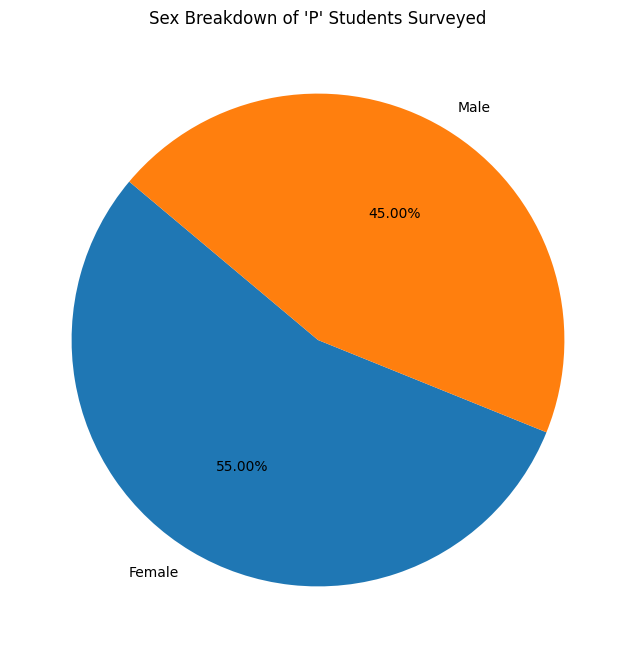

In [41]:
# Section 3 - visualizing data

# Chart 1: Pie chart for "P" count by sex. **Note: there were no respondents for "Prefer not to say", so it is not represented in any of the charts
# setting figure and axes
fig, ax = plt.subplots(figsize=(14,8), dpi=100)

# creating a new subset for 'P' data only
p_data = df[df['P/J'] == 'P']

# finding the sex breakdown

# Group by 'Sex' and count the occurrences
sex_counts = p_data['Sex'].value_counts()
print(sex_counts)

# creating the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.2f%%', startangle=140)
plt.title("Sex Breakdown of 'P' Students Surveyed")

Male      29
Female    28
Name: Sex, dtype: int64


Text(0.5, 1.0, "Sex Breakdown of 'J' Students Surveyed")

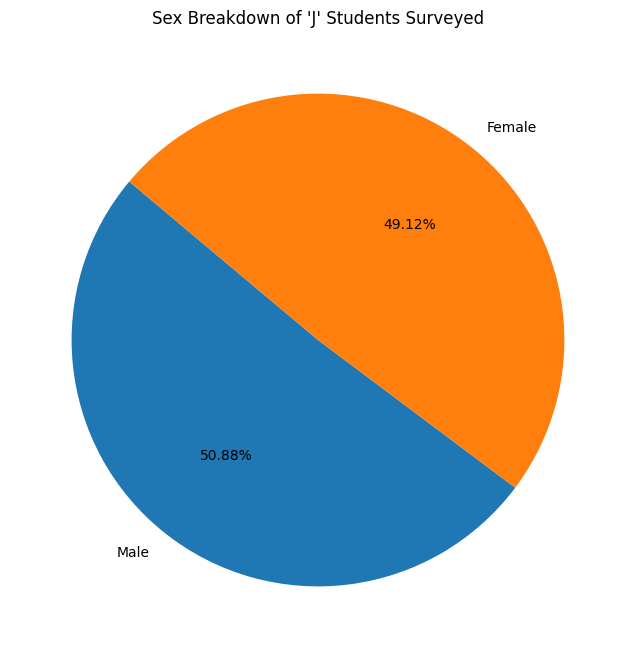

In [5]:
# Chart 2: Pie chart for "J" count by sex
# setting the figure and axes
fig, ax = plt.subplots(figsize=(14,8), dpi=100)

# creating a new subset for 'J' data only
j_data = df[df['P/J'] == 'J']
# finding the sex breakdown
sex_counts2 = j_data['Sex'].value_counts()
print(sex_counts2)

# creating the pie chart
plt.pie(sex_counts2, labels=sex_counts2.index, autopct='%1.2f%%', startangle=140)
plt.title("Sex Breakdown of 'J' Students Surveyed")


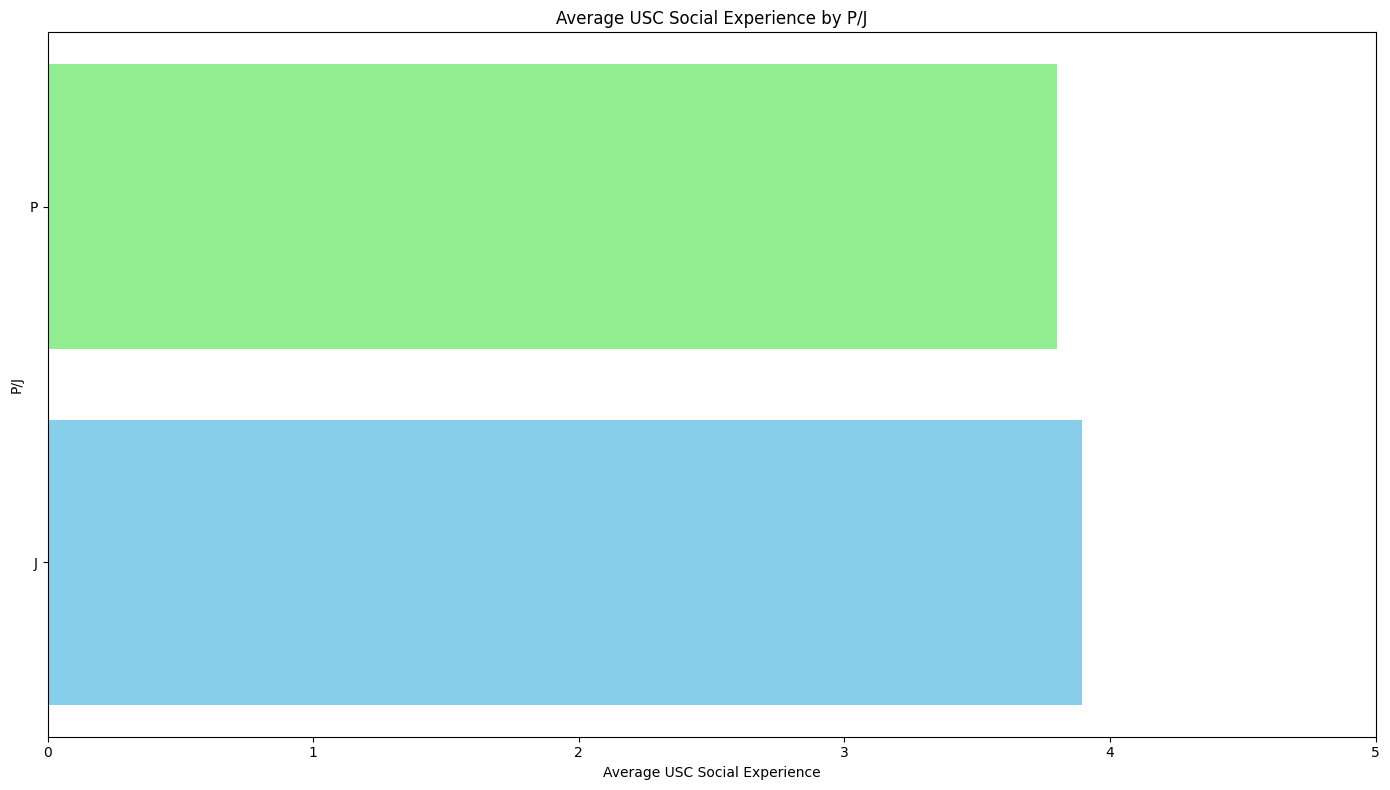

In [6]:
# Chart 3: Create a horizontal bar chart that shows how each personality in your extracted column rated their USC_Social_Exp. You can use the average of both personality groups.
# Include a title, axis labels, tick marks for the x-axis, and which bar represents which group.
# setting the figure and axes
fig, ax = plt.subplots(figsize=(14,8), dpi=100)

# new subset to find the averages of social experience by P or J
social_exp_avg = df.groupby('P/J')['USC_Social_Exp'].mean()
social_exp_avg.head()

# Plot the horizontal bar chart
plt.barh(social_exp_avg.index, social_exp_avg, color=['skyblue', 'lightgreen'])
# Set x-axis limits to show the full range (0 to 5)
plt.xlim(0, 5)
# setting labels and title
ax.set_xlabel('Average USC Social Experience')
ax.set_ylabel('P/J')
ax.set_title('Average USC Social Experience by P/J')
plt.tight_layout()



In [7]:
# Section 4 - analysis
# Overall_USC_Exp vs USC_Social_Exp

# Conduct a correlation analysis using the Pearson method to determine if there is a correlation between the 2 variables you are assigned.
overall_vs_social = df[['Overall_USC_Exp', 'USC_Social_Exp']]

# Calculate the correlation using the pearson method
overall_vs_social.corr(method='pearson')

# Answer the following question:
# What is the correlation coefficient between your assigned variables? Interpret the correlation coefficient value.
# The correlation coefficient is 0.637, which isn't very high


,Overall_USC_Exp,USC_Social_Exp
Overall_USC_Exp,1.000000,0.636972
USC_Social_Exp,0.636972,1.000000


In [39]:
# Section 5 - data marts
# Create Data Mart 1:
# A data mart which only contains data from students who are graduating in 2024 and whose GPA is in between 3.3-3.6.
dm1 = df[(df['Grad_Year'] == 2024) & (df['GPA'].between(3.3, 3.6))]
print("Data Mart 1: ")
dm1.head()

Data Mart 1: 


,Personality_Type,Grad_Year,GPA,Sex,Overall_USC_Exp,Merit_Scholarship_Percent,Age,USC_Social_Exp,P/J
3,ENFJ-A,2024,3.56,Male,4,0%,22,4,J
5,ESTJ-A,2024,3.47,Female,5,0%,21,5,J
13,INTP-A,2024,3.44,Male,4,0%,22,4,P
14,ESTJ-A,2024,3.40,Female,5,0%,21,5,J
15,ESFJ-A,2024,3.59,Male,4,0%,21,4,J


In [40]:
# Create Data Mart 2:
# A data mart which only contains data from students who earn at least 50% merit scholarship.
dm2 = df[df['Merit_Scholarship_Percent'] >= '50']
print("Data Mart 2:")
dm2.head()

Data Mart 2:


,Personality_Type,Grad_Year,GPA,Sex,Overall_USC_Exp,Merit_Scholarship_Percent,Age,USC_Social_Exp,P/J
6,ISTJ-T,2025,3.93,Female,4,50%,21,3,J
10,ISFJ-A,2024,3.95,Male,4,50%,21,4,J
11,ISTJ-T,2024,3.78,Male,3,50%,21,3,J
16,ESFJ-A,2024,3.96,Female,5,75%,22,4,J
19,INFJ-A,2024,3.78,Female,5,75%,21,4,J
